<img src="logo_UNSAM.jpg" align="right" width="120">


# <center>Trabajo final: *Detección de oscilaciones de la frecuencia cardíaca postictales en epilepsia parcial*</center> 

### <center> - Alumna: Lola Pampin</center> 

### <center> - Profesor: Mariano Llamedo Soria</center> 

### <center>Febrero 2026</center> 

## <center> Universidad Nacional de San Martín, Escuela de Ciencia y Tecnología</center> 




# **I. Introducción**
## <u>**Marco clinico**</u>
## *Epilepsia*
La epilepsia es un trastorno neurológico crónico caracterizado por la aparición recurrente de crisis, producto de una actividad neuronal anormal, excesiva o sincrónica en el cerebro. Estas crisis pueden generar consecuencias negativas tanto a corto como a largo plazo, incluyendo caídas, traumatismos, mortalidad prematura, trastornos psiquiátricos, déficits cognitivos y dificultades en el ámbito social, laboral y académico.

<u> *Clasificación de epilepsia*</u>

La epilepsia se puede clasificar según el tipo de convulsión. Según la Liga Internacional contra la Epilepsia las convulsiones se clasifican según donde se originan en el cerebro. A partir de este parámetro las convulsiones pueden ser:
- <u>Generalizadas</u>: se originan simultáneamente en ambos hemisferios (inicio generalizado).
- <u>Parciales</u>: son aquellas que poseen un inicio focal, es decir en una sola zona del cerebro. Este tipo de convulsión se divide a su vez en simples (afectan una pequeña porción del cerebro)  o complejas (comienzan en un área y se propagan a otra). 
La principal diferencia entre una convulsión parcial simple y una convulsión parcial compleja es la alteración de la consciencia y un período postictal en esta última, que también se presenta en una convulsión generalizada. Es decir, las convulsiones parciales complejas y las generalizadas pueden presentarse de forma similar, pero difieren en que en las parciales la convulsión se propaga de un área focal a otra (no se presenta en ambos hemisferios al mismo tiempo).
### *Ritmo cardíaco*
La medición del ritmo cardíaco constituye una herramienta fundamental en el monitoreo de la salud, ya que permite detectar alteraciones en la actividad cardiovascular y evaluar el estado físico de una persona. 

Específicamente, la frecuencia cardiaca es el número de veces que se contrae el corazón durante un minuto. Desde el punto de vista teórico, el cálculo del ritmo cardíaco se realiza midiendo el intervalo entre latidos consecutivos, denominado intervalo RR. La representación de este intervalo en la onda del ECG se puede observar en la figura I. 
El ritmo cardíaco se puede obtener a través de este intervalo, como se muestra en la ecuación 1 y 2. 
Intervalo RR s=Intervalo RRmuestras1Frecuencia de muestreo         (1)


Figura I. Onda de ECG con representación del intervalo RR

	Finalmente, a partir de dicho valor, se calcula el ritmo cardíaco en pulsaciones por minuto (BPM) como:

BPM = 60Intervalo RR en segundos                                (2)
Variabilidad de la frecuencia cardiaca
	La variabilidad de la frecuencia cardíaca (HRV por sus siglas en inglés) es la variación de la frecuencia de los latidos del corazón durante un intervalo de tiempo determinado.
### *Electrocardiograma*
El electrocardiograma (ECG) es un estudio que mide las señales eléctricas del corazón durante cada latido. Su análisis permite identificar patologías, alteraciones del ritmo cardíaco y variaciones en la conducción eléctrica. Los principales componentes de un latido son:
- *<u>Onda P</u>*: representa la despolarización auricular (las cavidades superiores del corazón se activan eléctricamente). Es de baja amplitud (0.1-0.2 mV) y relativamente lenta.
- *<u>Complejo QRS</u>*: corresponde a la despolarización ventricular (activación eléctrica de los ventrículos, las cavidades encargadas de bombear sangre al cuerpo). Es el componente de mayor energía y rapidez en el ECG. Su pendiente pronunciada requiere preservar componentes de frecuencia relativamente altas.
- *<u>Onda T </u>*: asociada a la repolarización ventricular (luego de activarse, las células vuelven a su voltaje "de reposo"). Es más ancha que la onda P y su contenido espectral es de menor frecuencia que el QRS.






# **II. Métodos**



# **III. Desarrollo**
Para el desarrollo del presente trabajo se utilizaron los registros de electrocardiograma (ECG) correspondientes a dos pacientes, identificados como los números 1 y 7 de la base de datos analizada. En primer lugar, se procedió a la lectura de los archivos y a la detección de los latidos cardíacos mediante el código que se presenta a continuación. Adicionalmente, se graficaron los registros de ECG junto con las detecciones de los latidos, con el objetivo de visualizar el procedimiento realizado.

In [5]:
# %% LIBRERIAS


import matplotlib.pyplot as plt
from os import listdir
from scipy.signal import welch, windows
from numpy.fft import fft
from scipy.interpolate import interp1d
import math

import numpy as np
from scipy.signal import butter, filtfilt, find_peaks


# %% Variables globales

FS=200 #Hz --> establecida en paper 
F_QRS=[5,15] # [Hz] rango de frecuencia complejo QRS

FS_hr = 4.0  # Hz frecuencia para muestreo uniforme de HR para aplicacion de la FFT

## Frecuencia cardiaca minima y maxima (umbral fisiologico) ##
MIN_HR=30 #latidos/min
MAX_HR=220

RR_MIN = 0.3 #[s]  (200 bpm)
rr_max = 2#[s]  (30 bpm)

PRE_ICT1 = 14
POS_ICT1= 16


"""
####Tiempos de episodios segun pacientes####
sz01 = ("00:14:36", "00:16:12")
sz02_01 = ("01:02:43", "01:03:43")
sz02_02 = ("02:55:51", "02:56:16")  
sz03_01 = ("01:24:34", "01:26:22")
sz03_02 = ("02:34:27", "02:36:17")  
sz04 = ("00:20:10", "00:21:55")
sz05 = ("00:24:07", "00:25:30")
sz06_01 = ("00:51:25", "00:52:19")
sz06_02 = ("02:04:45", "02:06:10") 
sz07 = ("01:08:02", "01:09:31")
"""



'\n####Tiempos de episodios segun pacientes####\nsz01 = ("00:14:36", "00:16:12")\nsz02_01 = ("01:02:43", "01:03:43")\nsz02_02 = ("02:55:51", "02:56:16")  \nsz03_01 = ("01:24:34", "01:26:22")\nsz03_02 = ("02:34:27", "02:36:17")  \nsz04 = ("00:20:10", "00:21:55")\nsz05 = ("00:24:07", "00:25:30")\nsz06_01 = ("00:51:25", "00:52:19")\nsz06_02 = ("02:04:45", "02:06:10") \nsz07 = ("01:08:02", "01:09:31")\n'

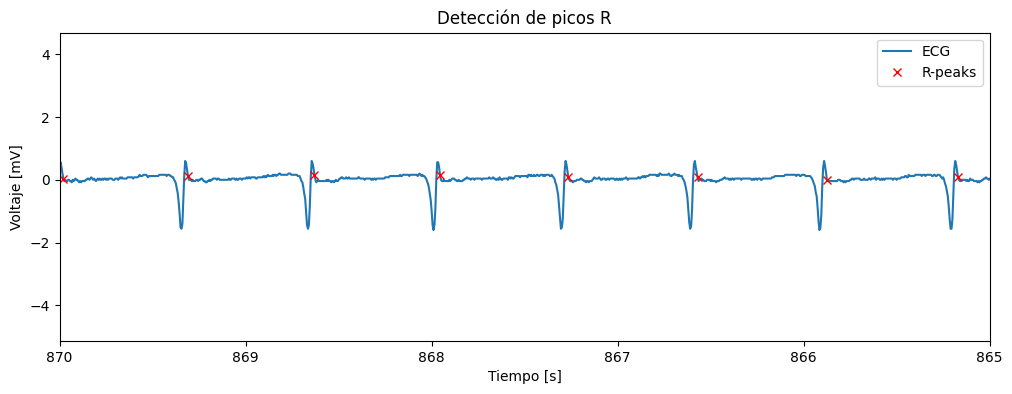

In [6]:
# %% Lectura  + Graficos ECG sin filtrar

def leer_archivo(path, start, stop):
    #Lectura de archivos
    start *= 12000
    stop *= 12000
    raw = np.fromfile('data/' + path, dtype=np.int16)
    gain = 25
    baseline = 26

    ecg_mV = (raw - baseline) / gain
    
    t = np.arange(len(ecg_mV)) / FS
    
    return ecg_mV[start:stop],t[start:stop]

# %% Deteccion de latidos

def detect_rpeaks(ecg,t):
    # Filtrado para QRS
    b, a = butter(2, F_QRS, btype='band', fs=FS) # filtro digital tipo butter pasabanda en rango de frecuencia del complejo QRS de orden 2
    xf = filtfilt(b, a, ecg) #filtrado bidereccional

    # Altura mínima relativa y distancia mínima entre picos
    # Distancia mínima según HR máxima permitida
    min_dist = int(FS * 60.0 / MAX_HR) #distancia que tendrian los latidos si hr=220 lat/min

    # Altura mínima: percentil relativo --> umbral adaptativo
    med = np.median(xf) #promedio robusto
    mad = np.median(np.abs(xf - med)) # MAD = Median Absolute Deviation --> a cada elemento le resto la media y calculo la media del modulo de resta
    k=4 # define un umbral minimo de altura
    
    h = med + k * 1.4826 * mad   # 1.4826: factor que convierte la MAD en una desviacion estandar (distribucion gaussiana)
    #mediana + 4 veces el estimador de desviacion estandar
    
    peaks, _ = find_peaks(xf, distance=min_dist, height=h)

    # Filtrar picos demasiado cercanos según HR fisiológico
    rr = np.diff(peaks) / FS
    rr_ok = (rr > 60.0/MAX_HR) & (rr < 60.0/MIN_HR)
    keep = np.insert(rr_ok, 0, True)
    peaks = peaks[keep]

    return peaks

def prueba_latidos(ecg,t, peaks):
    #Funcion para comprobar la deteccion de latidos graficamente
    
    plt.figure(figsize=(12,4))
    plt.plot(t, ecg, label='ECG')
    plt.plot(t[peaks], ecg[peaks], 'r x', label='R-peaks')
    plt.xlim(870,865) #ejemplo para visualizacion paciente 1
    plt.legend(); plt.xlabel('Tiempo [s]'); plt.ylabel('Voltaje [mV]')
    plt.title('Detección de picos R')
    plt.show()
    
    return


files = [file for file in listdir('data')]
paciente1 = files[0]
ecg, t = leer_archivo(paciente1, 12 , 25)
latidos = detect_rpeaks(ecg,t)
prueba_latidos(ecg,t, latidos)

A partir de la detección de los latidos, se procedió a la construcción de los intervalos RR y al cálculo del ritmo cardíaco. 

Posteriormente, se estimó la línea de base mediante una interpolación utilizando un polinomio de cuarto grado. Finalmente, se obtuvo la señal de ritmo cardíaco detrendida al restar dicha tendencia de la señal original.



Pico en banda 0.01–0.10 Hz: 0.0244 Hz (potencia relativa=1.46e+04)


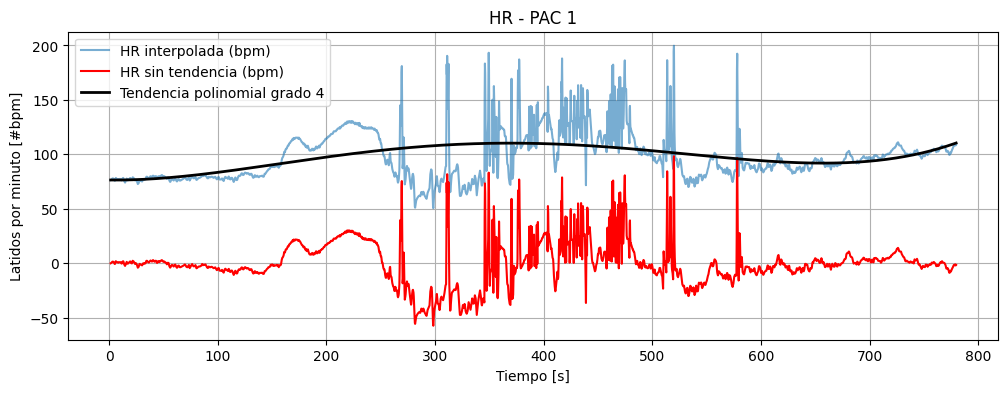

In [9]:
def const_RR (latidos):
    
    #latidos = np.asarray(latidos, dtype=float)
    t_r = latidos / FS  # tiempos de ocurrencia de cada latido (s)
    rr = np.diff(t_r)   # en segundos --> np.diff resta el actual con el anterior == armo los intervalor RR
    

    good = (rr >= RR_MIN) & (rr <= rr_max) #compruebo eliminar valores absurdos

    rr_clean = rr[good]
    t = t_r[1:][good]   # tiempos asociados a cada RR
    
    hr = 60/rr_clean # frecuencia cardiaca  

#### INTERPOLACION
    
    t0 = t[0]
    t1 = t[-1] # ultimo elemento del array
    t_u = np.arange(t0, t1, 1.0/FS_hr)   # eje de tiempo uniforme
    
    # Interpolación lineal (suele ser suficiente para HRV lenta)
    f = interp1d(t, hr, kind='linear', fill_value='extrapolate', bounds_error=False)
    hr_u = f(t_u)   # HR(t) uniforme, en bpm
    
    # Ajuste polinomial de grado 4 (paper) sobre HR_u vs t_u
    p = np.polyfit(t_u, hr_u, deg=4)
    trend = np.polyval(p, t_u)
    
    hr_detr = hr_u - trend   # señal de HR sin tendencia (bpm)

    N = len(hr_detr)
    
    # Ventana rectangular (implícita); FFT de una sola cara
    HR = np.fft.rfft(hr_detr, n=N)
    freqs = np.fft.rfftfreq(N, d=1.0/FS_hr)
    
    # PSD no normalizada (proporcional)
    PSD = (np.abs(HR)**2) / N
    
    # Recorte de banda 0.01–0.10 Hz
    f_lo, f_hi = 0.01, 0.10
    band = (freqs >= f_lo) & (freqs <= f_hi) #array de booleanos
    freq_band = freqs[band]
    psd_band  = PSD[band]
    
    # Pico espectral dentro de 0.01–0.10 Hz
    if np.any(band):
        kmax = np.argmax(psd_band)
        f_peak = freq_band[kmax]
        p_peak = psd_band[kmax]
    else:
        f_peak = np.nan
        p_peak = np.nan
    
    print(f"Pico en banda 0.01–0.10 Hz: {f_peak:.4f} Hz (potencia relativa={p_peak:.3g})")
    return hr_detr, hr_u, t_u, trend

def grafico_hr_det(t_u, hr_u, trend, name):
    
    hr_detr = hr_u - trend 
    
    
    # HR(t) cruda vs detrendida
    plt.figure(figsize=(12,4))
    plt.plot(t_u, hr_u, label='HR interpolada (bpm)', alpha=0.6)
    plt.plot(t_u, hr_detr, label='HR sin tendencia (bpm)', color='r')
    plt.plot(t_u, trend, label='Tendencia polinomial grado 4', color='k', lw=2)
    plt.xlabel('Tiempo [s]'); plt.ylabel('Latidos por minuto [#bpm]'); plt.title(f'HR - {name}')
    plt.legend(); plt.grid(True); plt.show()  
    return


hr_d, hr_u, t_u, trend = const_RR(latidos)
grafico_hr_det(t_u, hr_u, trend, "PAC 1")

Una vez obtenido el ritmo cardiaco, se busca obtener el espectro preictal y postictal. Para ello se calcula la transformada rápida de Fourier con una ventana rectangular (de igual manera que en el paper), pero también se obtiene mediante el método de Welch, con el objetivo de realizar un análisis más preciso. Ambos métodos se grafican para su posterior comparación.

Pico en banda 0.01–0.10 Hz: 0.0254 Hz (potencia relativa=151)


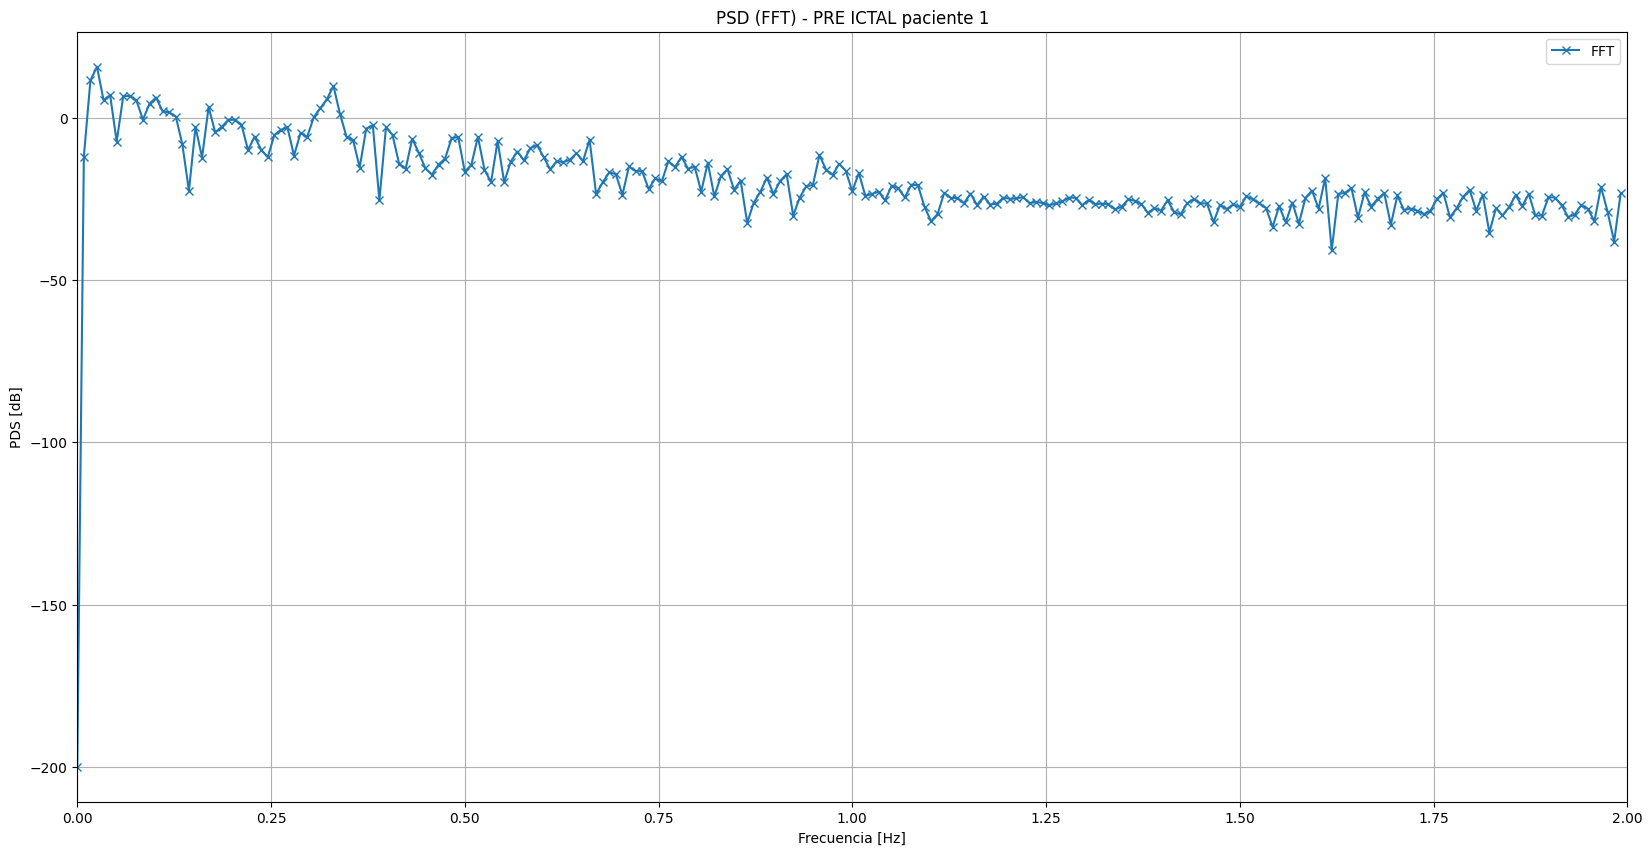

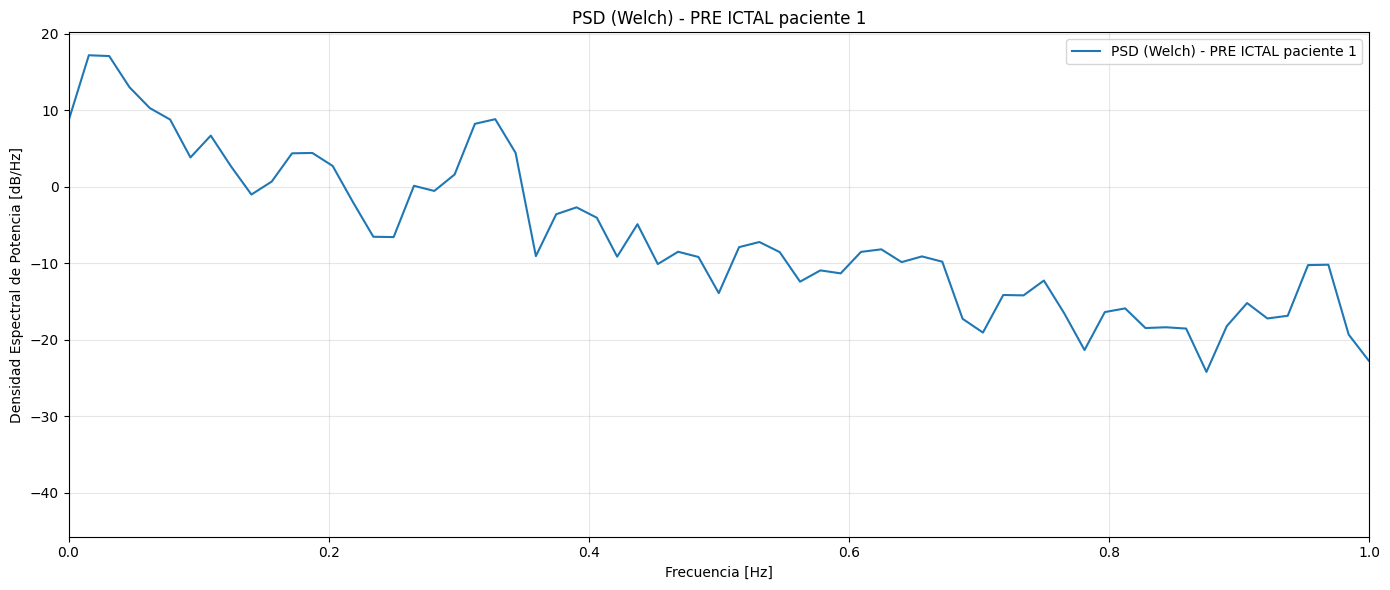

Pico en banda 0.01–0.10 Hz: 0.0251 Hz (potencia relativa=2.15e+04)


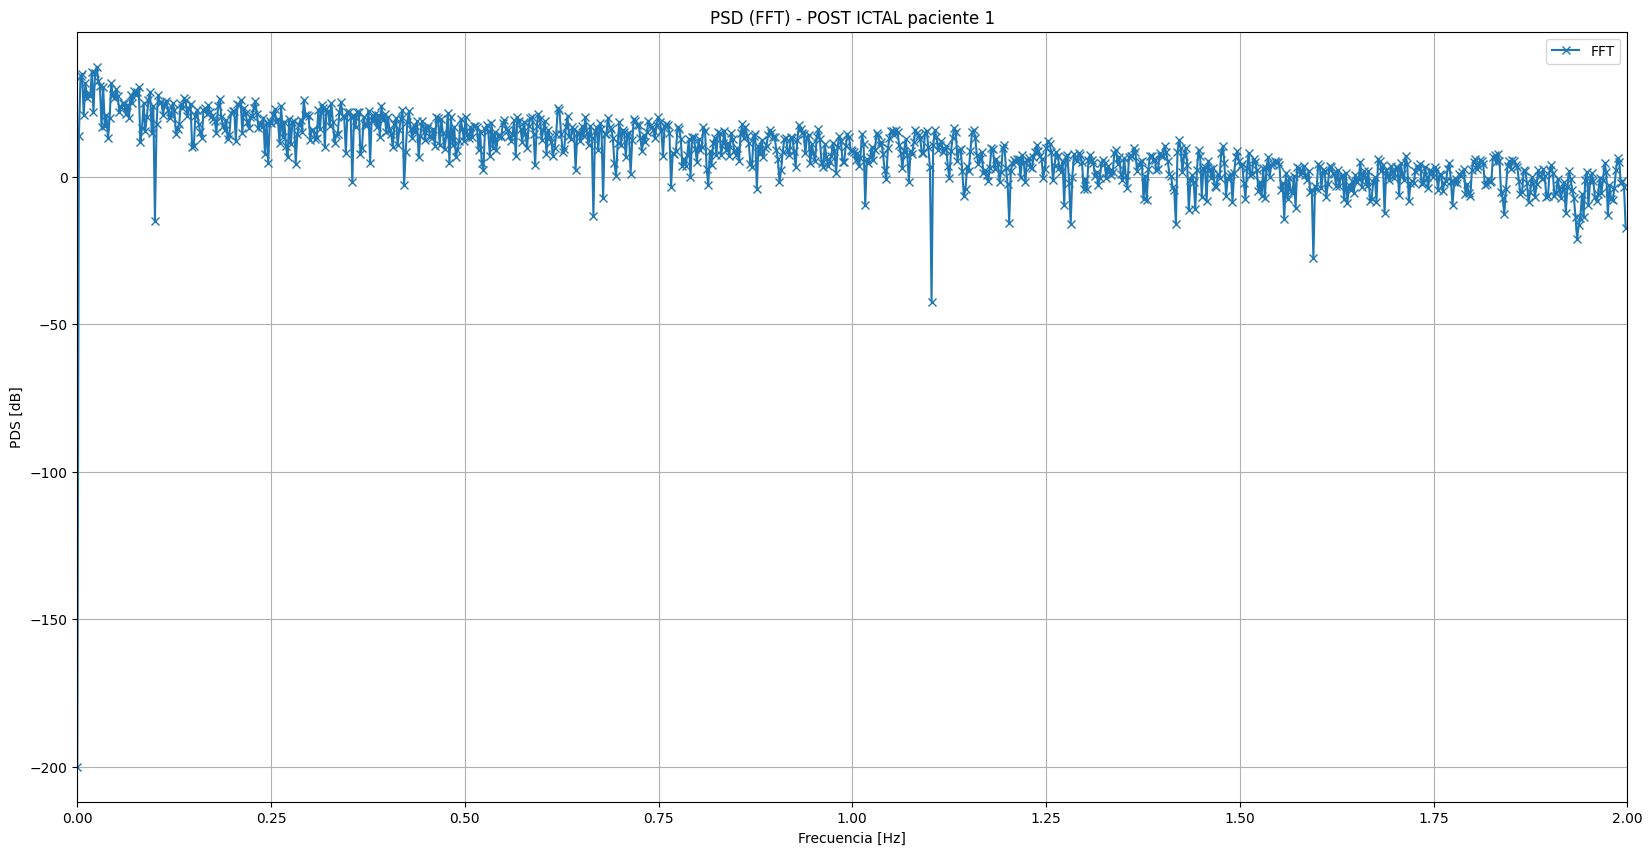

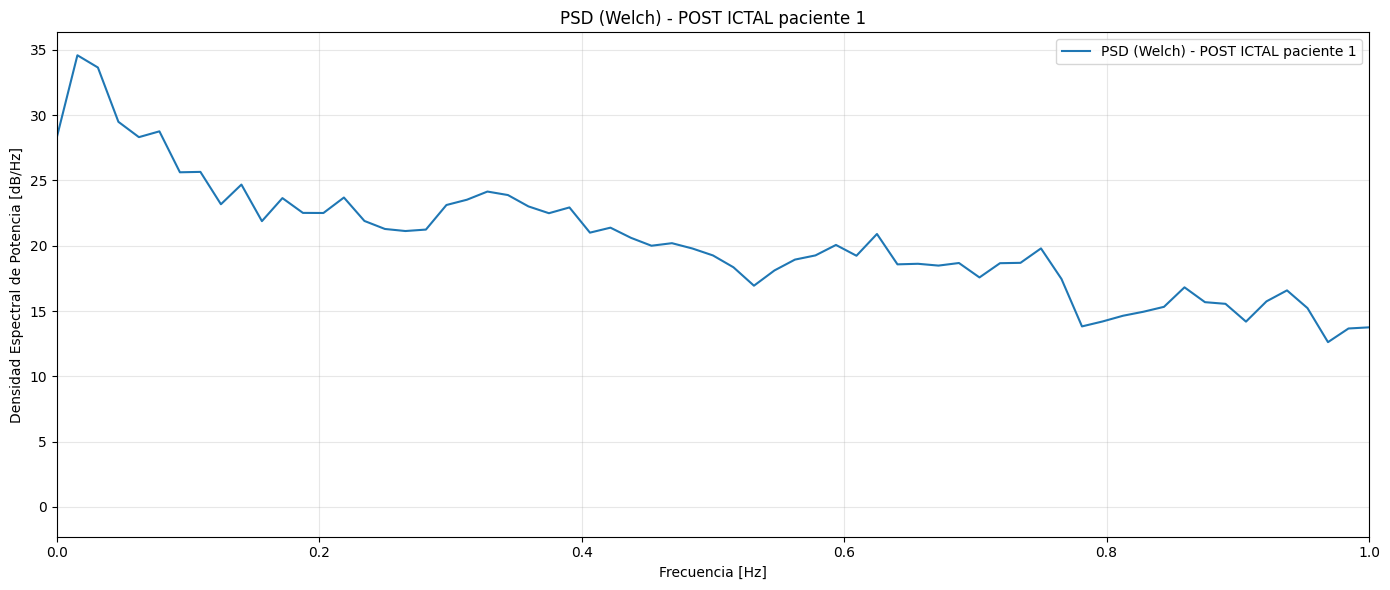

In [10]:
def transformada_rapida(x, name):
    X = fft(x)    
    PDS = np.abs(X)**2
    
    N= len(x)
    df= df = FS_hr / N #resolucion espectral = [[1/(s*muestras)]
    
    
    Ff=np.arange(N)*df #mi eje x en hz
    
    Ff = Ff[:N//2]
    PDS = (np.abs(X)**2) / (N * FS_hr)
    PDS = PDS[:N//2]

    # Gráfico
    plt.figure(figsize=(20, 10))
    plt.plot(Ff, 10 * np.log10(PDS + 1e-20), 'x-', label='FFT')
    plt.xlim([0, FS_hr/2])
    plt.title("PDS [dB] ")
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('PDS [dB]')
    plt.title(f'PSD (FFT) - {name}')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return Ff, PDS

# %% PSD POR WELCH
def welch_psd(x, name="PSD WELCH",
              seg_len_sec=60,        # 60–120 s va bien para 0.03–0.1 Hz
              overlap=0.5,           # 50% de solapamiento
              detrend_already_done=True):
    """
    Calcula PSD con Welch usando ventana de Hann PERIÓDICA (sym=False),
    adecuada para análisis espectral con FFT.
    
    ecg_uniform: señal ya remuestreada a fs (muestras uniformes)
    fs: frecuencia de muestreo [Hz]
    """
    
    n = len(x)
    
    #control de error
    if n < 4:
        raise ValueError("La señal es demasiado corta.")
        

    # --- nperseg desde segundos (clave para baja frecuencia) ---
    nperseg = int(seg_len_sec * FS_hr)
    # Asegurar límites razonables
    nperseg = max(64, min(nperseg, n))  # al menos 64 muestras y no más que n
    
    # --- ventana Hann PERIÓDICA ---
    win = windows.hann(nperseg, sym=False)  # sym=False -> versión periódica (mejor para FFT/Welch)

    # --- solapamiento ---
    noverlap = int(nperseg * overlap)
    
    # --- nfft (potencia de 2 >= nperseg, útil para eficiencia y resolución) ---
    

    def next_pow2(x):
        return 2 ** math.ceil(math.log2(max(1, int(x))))
    nfft = max(nperseg, next_pow2(nperseg)) #si nperseg no es potencia de 2, entonces nfft se sube a la siguiente potencia de 2.

    # --- Welch ---
    f, Pxx = welch(x,#senal
                   fs=FS_hr, #frecuencia de muestreo
                   window=win, 
                   nperseg=nperseg,
                   noverlap=noverlap,
                   nfft=nfft,
                   return_onesided=True,
                   average= 'mean', #promedio robusto
                   scaling='density')  # PSD en unidades/Hz

    # --- Gráfico ---
    eps = 1e-20
    plt.figure(figsize=(14, 6))
    plt.plot(f, 10*np.log10(Pxx + eps), label=f'PSD (Welch) - {name}')
    plt.xlim(0,1)
    plt.title(f'PSD (Welch) - {name}')
    plt.ylabel('Densidad Espectral de Potencia [dB/Hz]')
    plt.xlabel('Frecuencia [Hz]')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.legend()
    plt.show()

    return f, Pxx

ecg_pre,t_pre= leer_archivo(paciente1, 12, 14)
latidos_pre_01= detect_rpeaks(ecg_pre,t_pre)
hr_pre_01, tr_pre_01, _ , _= const_RR(latidos_pre_01)
Ff_pre,PSD_pre= transformada_rapida(hr_pre_01, "PRE ICTAL paciente 1")
f_hr_pre_01,pxx_pre_01= welch_psd(hr_pre_01, "PRE ICTAL paciente 1")
    
ecg_post, t_post= leer_archivo(paciente1, 17, 25)
latidos_post_01= detect_rpeaks(ecg_post,t_post)
hr_post_01, tr_01,  _ , _ = const_RR(latidos_post_01)
Ff_post_01,PSD_post_01= transformada_rapida(hr_post_01, "POST ICTAL paciente 1")
f_hr_post_01,pxx_post_01= welch_psd(hr_post_01, "POST ICTAL paciente 1")


# **IV. Resultados**

# **V. Conclusiones**